[Reference](https://python.plainenglish.io/exploring-spatial-interpolation-with-pykrige-a-comprehensive-guide-to-kriging-in-python-67eaa1b8362e)

In [1]:
pip install pykrige

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 854.9/854.9 kB 12.6 MB/s eta 0:00:00


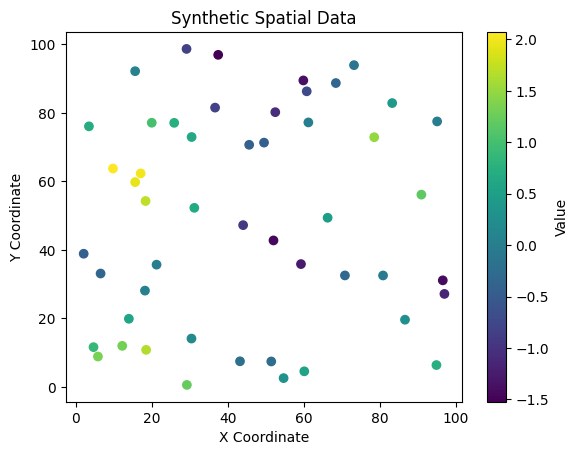

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data: 50 points
np.random.seed(42)  # For reproducibility
x_coords = np.random.uniform(0, 100, 50)
y_coords = np.random.uniform(0, 100, 50)
values = np.sin(x_coords * 0.1) + np.cos(y_coords * 0.1) + np.random.normal(0, 0.1, 50)

# Plotting the synthetic data
plt.scatter(x_coords, y_coords, c=values, cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Synthetic Spatial Data')
plt.show()

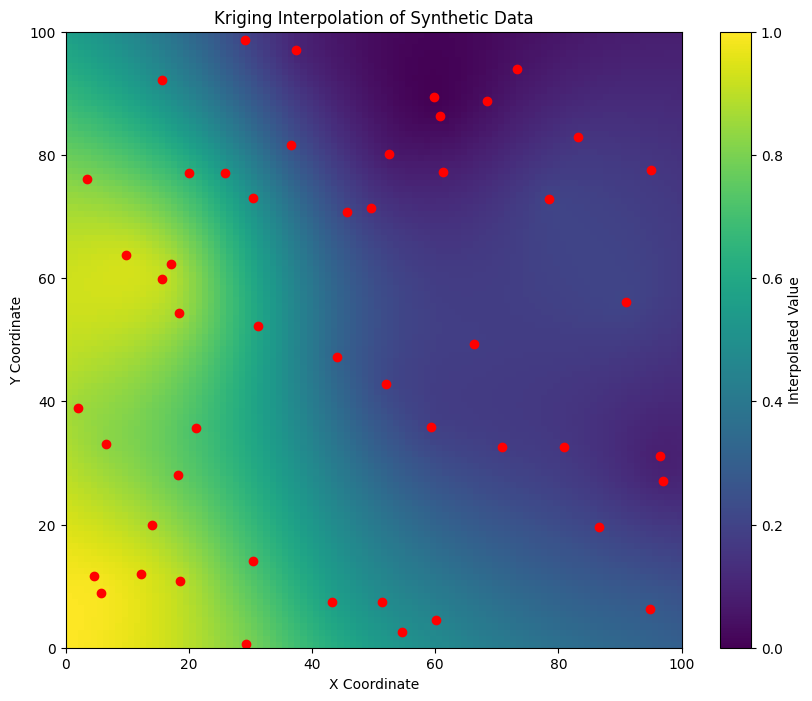

In [3]:
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt

# Create the Ordinary Kriging object
OK = OrdinaryKriging(
    x_coords,
    y_coords,
    values,
    variogram_model='linear',
    verbose=False,
    enable_plotting=False
)

# Generate a grid
gridx = np.linspace(0, 100, 100)
gridy = np.linspace(0, 100, 100)

# Perform kriging
z, ss = OK.execute('grid', gridx, gridy)

# z is the interpolated values
# ss is the squared error
plt.figure(figsize=(10, 8))
plt.imshow(z, extent=(0, 100, 0, 100), origin='lower', cmap='viridis')
plt.scatter(x_coords, y_coords, c='red')  # original data points
plt.colorbar(label='Interpolated Value')
plt.title('Kriging Interpolation of Synthetic Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()